<a href="https://colab.research.google.com/github/huaijiangzhu/SummerML/blob/master/day5/fish_market_alternatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'axes.labelcolor':'white', 'ytick.color':'white'});

In [ ]:
feature = pd.read_csv('https://raw.githubusercontent.com/huaijiangzhu/SummerML/master/day5/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/huaijiangzhu/SummerML/master/day5/fish_market_label.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = feature.values
y = label.values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state=0)

X_test = pd.read_csv('https://raw.githubusercontent.com/huaijiangzhu/SummerML/master/day5/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/huaijiangzhu/SummerML/master/day5/fish_market_test_label.csv').values

In [ ]:
def print_and_plot(y_pred, y):
    MAE = np.mean(np.abs(y_pred - y))
    RMSE = np.sqrt(np.mean((y_pred - y)**2))
    print ('The RMSE is {:0.2f}'.format(RMSE))
    print ('The MAE is {:0.2f}'.format(MAE))
    plt.plot(y_pred, 'o', label='predicted')
    plt.plot(y, 'o', label='ground truth')
    plt.legend(loc='upper left');

## Ridge linear regression without feature engineering

The RMSE is 80.17
The MAE is 62.12


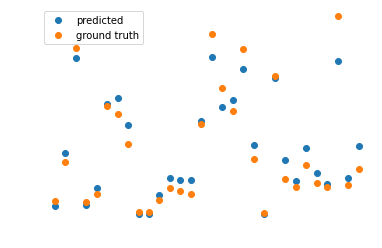

In [ ]:
model = Ridge(alpha=10)
model.fit(X_train, y_train)

# If a prediction is negative, set it to zero
y_hat = np.maximum(model.predict(X_test), 0)
print_and_plot(y_hat, y_test)

## With polynomial feature transformation

The RMSE is 54.30
The MAE is 34.81


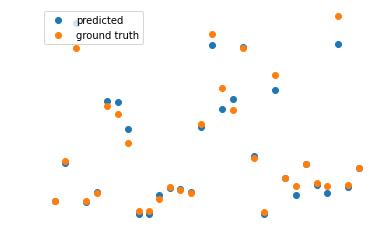

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
PhiX_train = poly.fit_transform(X_train)
PhiX_test = poly.fit_transform(X_test)

model = Ridge(1e2)
model.fit(PhiX_train, y_train)
y_hat = model.predict(PhiX_test)
print_and_plot(y_hat, y_test)

### With RBF feature transformation

The RMSE is 50.42
The MAE is 30.79


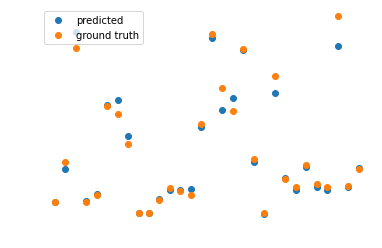

In [ ]:
from itertools import product

def rbf_transformation(X, X_train, s=1e-3):
    N = X.shape[0]
    N_train = X_train.shape[0]
    DXX = np.zeros((N, N_train))
    KXX = np.zeros((N, N_train))

    for i,j in product(range(N), range(N_train)):
        DXX[i, j] = np.linalg.norm(X[i] - X_train[j])**2
        
    for i,j in product(range(N), range(N_train)):
        KXX[i, j] = np.exp(-0.5*s*DXX[i, j])

    return KXX

PhiX_train = rbf_transformation(X_train, X_train)
PhiX_test = rbf_transformation(X_test, X_train)

model = Ridge(alpha=1e-6)
model.fit(PhiX_train, y_train)
y_hat = model.predict(PhiX_test)
print_and_plot(y_hat, y_test)

### Leave-one-out cross-validation

In [ ]:
N = X.shape[0]
MAE = 0
poly = PolynomialFeatures(3)
model = Ridge(alpha=1e2)

for n in range(N):
    X_val = X[n:n+1, :]
    y_val = y[n:n+1, :]
    X_train = np.delete(X, n, 0)
    y_train = np.delete(y, n, 0)

    PhiX_train = poly.fit_transform(X_train)
    PhiX_val = poly.fit_transform(X_val)

    model.fit(PhiX_train, y_train)
    y_hat = model.predict(PhiX_val)

    MAE += np.mean(np.abs(y_hat - y_val))

MAE = MAE/N
print ('Leave-one-out MAE for poly feature is: {:0.2f}'.format(MAE))

Leave-one-out MAE for poly feature is: 35.11


In [ ]:
N = X.shape[0]
MAE = 0
s = 1e-3
model = Ridge(alpha=1e-6)

for n in range(N):
    X_val = X[n:n+1, :]
    y_val = y[n:n+1, :]
    X_train = np.delete(X, n, 0)
    y_train = np.delete(y, n, 0)

    PhiX_train = rbf_transformation(X_train, X_train, s)
    PhiX_val = rbf_transformation(X_val, X_train, s)

    model.fit(PhiX_train, y_train)
    y_hat = model.predict(PhiX_val)

    MAE += np.mean(np.abs(y_hat - y_val))

MAE = MAE/N
print ('Leave-one-out MAE for RBF feature is: {:0.2f}'.format(MAE))

Leave-one-out MAE for RBF feature is: 28.13
